In [3]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from langdetect import detect

In [4]:
file_path = '../data/helper_old/df_repos_metadata_star_no_range.json'
with open(file_path, 'r') as file:
    loaded_data = json.load(file)

In [5]:
df = pd.DataFrame(data=loaded_data)

In [6]:
#df.head(3)

In [7]:
#df.info()

### analyse if repo is in English

In [8]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "error"

In [9]:
df['language_spoken'] = df['description'].apply(detect_language)

In [10]:
len(df[df['language_spoken'] == 'en'])

926

In [11]:
df = df[df['language_spoken'] == 'en']

### analyse numeric values

In [13]:
df.describe()

,id,size,stargazers_count,watchers_count,forks_count,open_issues_count,forks,open_issues,watchers,score
count,9.260000e+02,9.260000e+02,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.0
mean,2.762532e+08,1.401036e+05,22038.984881,22038.984881,3565.965443,404.534557,3565.965443,404.534557,22038.984881,1.0
std,2.799340e+08,5.284589e+05,31124.642554,31124.642554,6214.434995,1062.533049,6214.434995,1062.533049,31124.642554,0.0
min,2.655400e+04,7.000000e+00,7193.000000,7193.000000,108.000000,0.000000,108.000000,0.000000,7193.000000,1.0
25%,4.278876e+07,5.780000e+03,8918.250000,8918.250000,976.000000,61.000000,976.000000,61.000000,8918.250000,1.0
50%,1.517537e+08,2.416700e+04,12462.000000,12462.000000,1753.500000,147.000000,1753.500000,147.000000,12462.000000,1.0
75%,5.456810e+08,8.754150e+04,22196.000000,22196.000000,3379.250000,353.000000,3379.250000,353.000000,22196.000000,1.0
max,9.548733e+08,1.087097e+07,335520.000000,335520.000000,49242.000000,16073.000000,49242.000000,16073.000000,335520.000000,1.0


In [19]:
# estimation for number of bins
stars = df['stargazers_count'].unique().tolist()
num_of_stars = len(stars)
num_of_stars

878

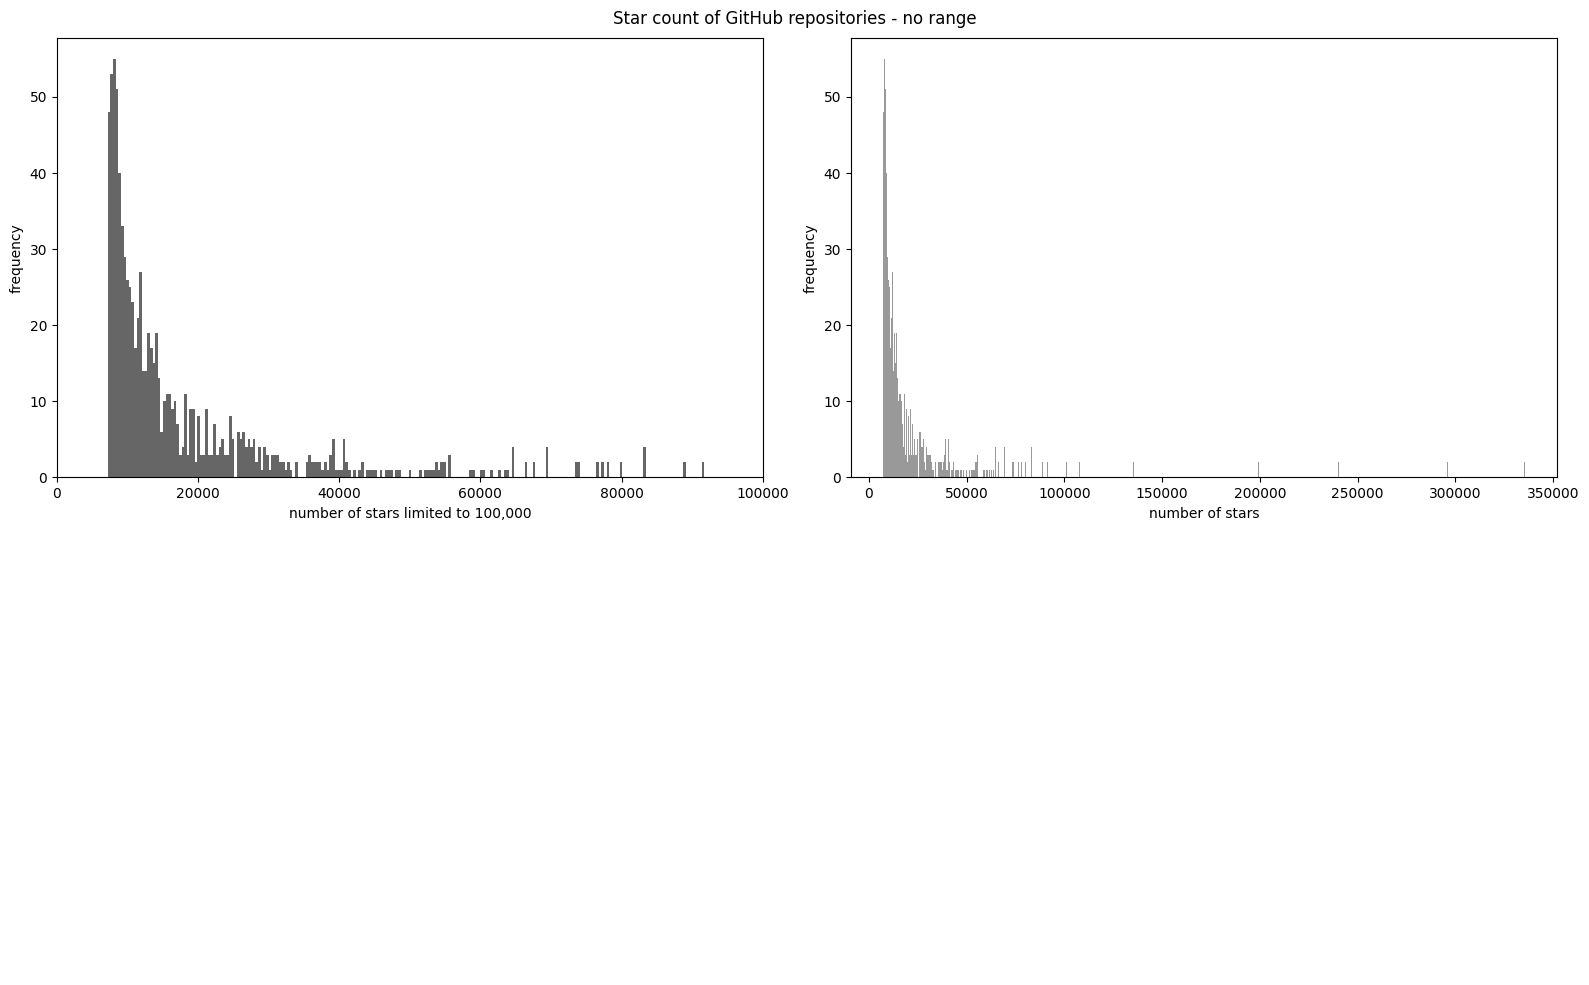

In [20]:
# number of stars
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10), sharex=False, sharey=False)
# sharex=True legt fest, ob Skala aller x-Achsen der Subplot gleich ist

# data
ax[0,0].hist(df['stargazers_count'], color='0.4', bins=num_of_stars)
ax[0,1].hist(df['stargazers_count'], color='0.6', bins=num_of_stars)
ax[1,1].axis('off') # plots anordnen
ax[1,0].axis('off')

# title
# ax[0,0].set_title('Stars count of GitHub repositorys - limited to 100,000')
# ax[0,1].set_title('Stars count of GitHub repositorys')

# lable axis x
ax[0,0].set_xlabel('number of stars limited to 100,000')
ax[0,1].set_xlabel('number of stars')

# lable axis y
ax[0,0].set_ylabel('frequency')
ax[0,1].set_ylabel('frequency')

# limitation axis
ax[0,0].set_xlim(0, 100000)

fig.suptitle('Star count of GitHub repositories - no range')
# format of interval between plots
plt.tight_layout()

plt.show()

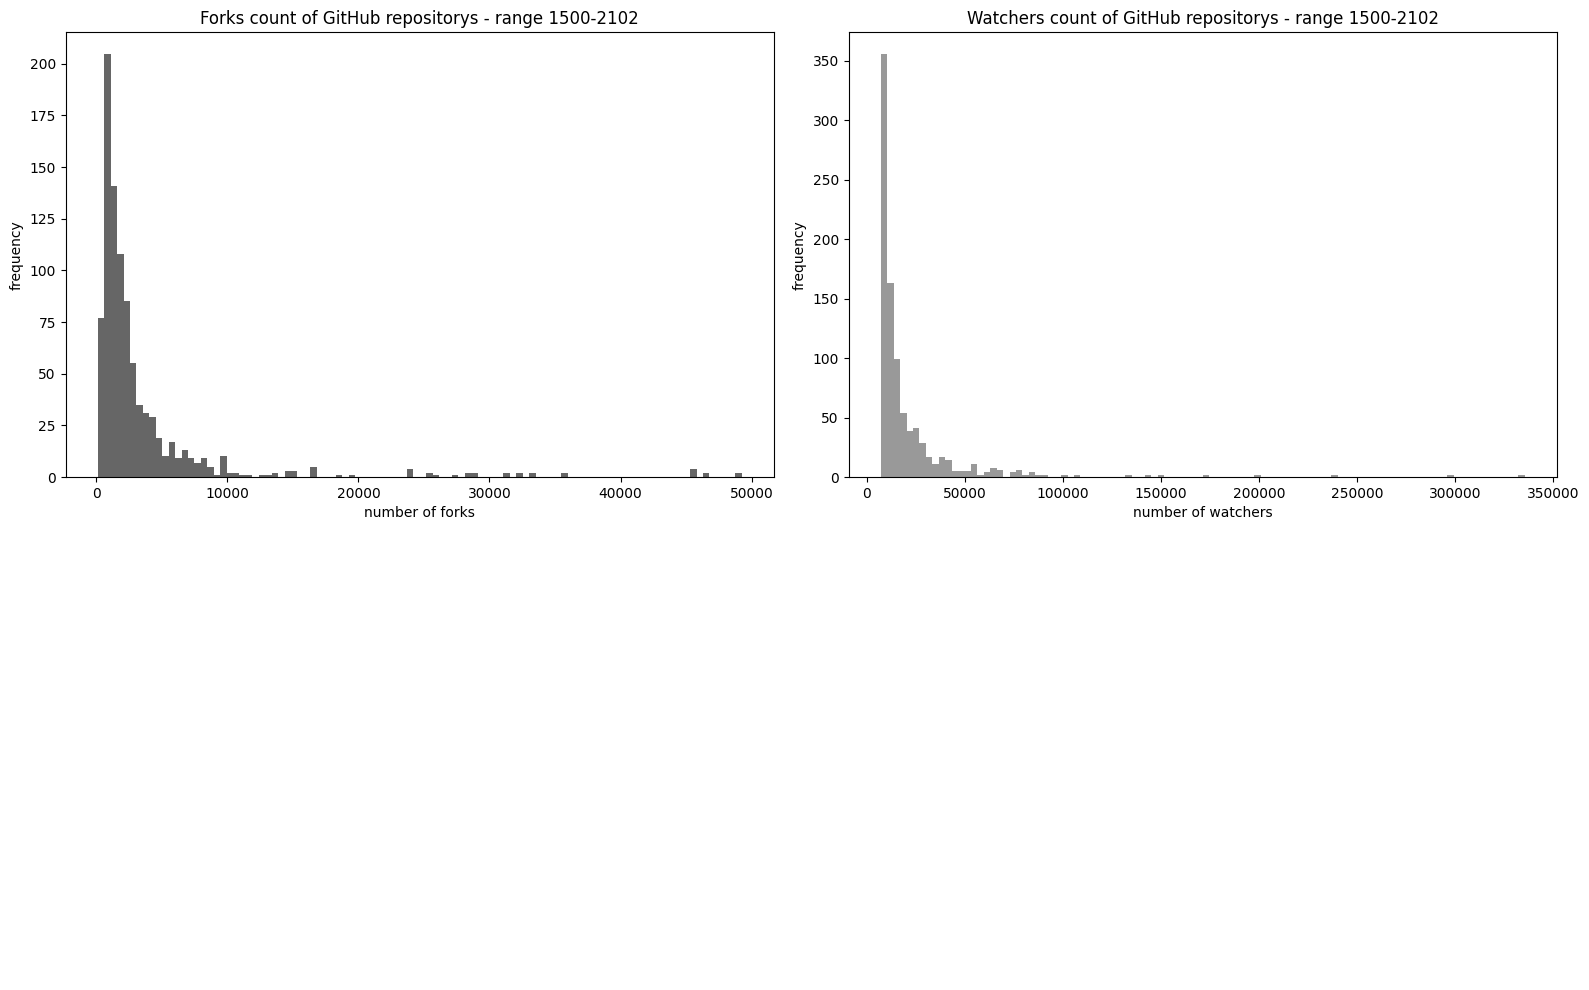

In [16]:
# number of forks & watchers
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10), sharex=False, sharey=False)
# sharex=True legt fest, ob Skala aller x-Achsen der Subplot gleich ist

# data
ax[0,0].hist(df['forks_count'], color='0.4', bins=100)
ax[0,1].hist(df['watchers_count'], color='0.6', bins=100)
ax[1,1].axis('off') # plots anordnen
ax[1,0].axis('off')

# title
ax[0,0].set_title('Forks count of GitHub repositorys - range 1500-2102')
ax[0,1].set_title('Watchers count of GitHub repositorys - range 1500-2102')

# lable axis x
ax[0,0].set_xlabel('number of forks')
ax[0,1].set_xlabel('number of watchers')

# lable axis y
ax[0,0].set_ylabel('frequency')
ax[0,1].set_ylabel('frequency')

# limitation axis
#ax[0,0].set_xlim(0, 100000)

# fig.suptitle('Forks count of GitHub repositories')
# format of interval between plots
plt.tight_layout()

plt.show()

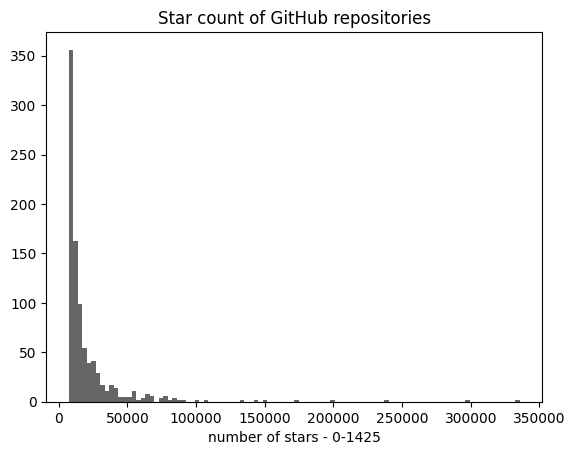

In [17]:
plt.hist(df['stargazers_count'], color='0.4', bins=100)
plt.xlabel('number of stars - 0-1425')
plt.title('Star count of GitHub repositories')

plt.show()

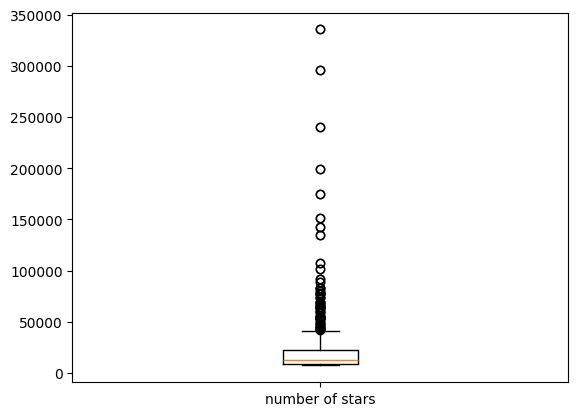

In [18]:
plt.boxplot(df[['stargazers_count']], tick_labels=['number of stars'])

plt.show()